### 1. Loading Libraries

In [1]:
import numpy as np
import math
import random
from scipy.stats import norm
from sklearn.preprocessing import normalize as nz
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn import metrics #confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
import time
#from  .model.MDBN import MDBN

In [2]:

#seed for reproducibility
SEED = 3425
random.seed(SEED)
rng = np.random.seed(SEED)

### 2. Loading learning traces

In [360]:
mat = np.loadtxt('./data/moodle2017/features/txt/ls_ar.txt',dtype=np.int32)
#mat_abs = np.abs(matrix_ls_ActiveReflexive)
##Negative values because sum up on active reflective was done on int 8 bits so the sum up of values greater than 128 was converted to negative numbr
mat_abs = np.abs(mat)
#print(mat)
mat_si = np.loadtxt('./data/moodle2017/features/txt/ls_si.txt',dtype=np.int32)
mat_vv = np.loadtxt('./data/moodle2017/features/txt/ls_vv.txt',dtype=np.int32)
mat_sg = np.loadtxt('./data/moodle2017/features/txt/ls_sg.txt',dtype=np.int32)

### Sparsity of data

In [361]:
#Number of zero of the matrix
np.count_nonzero(mat_abs==0)
print(" percentage of sparse cell LS_AR",np.count_nonzero(mat_abs==0)*100/((mat_abs.shape[0]*mat_abs.shape[1])))
print(" percentage of sparse cell LS_SI",np.count_nonzero(mat_si==0)*100/((mat_si.shape[0]*mat_si.shape[1])))
print(" percentage of sparse cell LS_vv",np.count_nonzero(mat_vv==0)*100/((mat_vv.shape[0]*mat_vv.shape[1])))
print(" percentage of sparse cell LS_SG",np.count_nonzero(mat_sg==0)*100/((mat_sg.shape[0]*mat_sg.shape[1])))

 percentage of sparse cell LS_AR 54.10989686819945
 percentage of sparse cell LS_SI 49.14575645756457
 percentage of sparse cell LS_vv 51.301396942540855
 percentage of sparse cell LS_SG 62.26168511685117


In [362]:
print ("Active Reflective shape:   ",mat_abs.shape)
print ("Sensitive Intuitive shape: ",mat_si.shape)
print ("Visual Verbal shape:       ",mat_vv.shape)
print ("Sequential Global shape:   ",mat_sg.shape)

Active Reflective shape:    (2168, 39)
Sensitive Intuitive shape:  (2168, 25)
Visual Verbal shape:        (2168, 14)
Sequential Global shape:    (2168, 12)


### 3. Filter relevant features

In [363]:
filt_ar = [0, 14, 20, 16, 19, 38, 15, 34, 9, 8, 3]
filt_si = [1, 2, 8, 9]
filt_vv = [2, 6, 9, 5, 0, 3, 1, 13, 11]
filt_sg = [5, 11, 7, 2, 0, 6, 3]

In [364]:
mat_ar_filt = mat_abs[:,filt_ar]
mat_si_filt = mat_si[:,filt_si]
mat_vv_filt = mat_vv[:,filt_vv]
mat_sg_filt = mat_sg[:,filt_sg]

### 4. Normalize the data

In [365]:
def normalize(x):
    mean = x.mean(axis=0)
    std = x.std(axis=0)
    return (x-mean)/std

In [366]:
#len(mat_ar_filt.mean(axis=0))
norm_mat_ar_filt = normalize(mat_ar_filt)
norm_mat_si_filt = normalize(mat_si_filt)
norm_mat_vv_filt = normalize(mat_vv_filt)
norm_mat_sg_filt = normalize(mat_sg_filt)

### 5. Clustering of the data for user preferences

In [367]:
from sklearn.cluster import KMeans

### We define k = 4 regarding the feature hint level of learning styles prefernces (Bernard, 2017 and Graf 2009). 3=good ; 2=moderate ; 1=low; 0=absence

In [371]:
'''
 Build the Hint matrix.
 Define a function which form a cluster of 4 groups for each    pattern(featues) in a learning style dimension.
'''
def build_clusters_preferences(X,k=4):
    (m,n) = X.shape
    Hint = np.zeros((m,n))
    km = KMeans(k,init='k-means++',max_iter=500, random_state=SEED) 
    for i in range(n):
        C_i = km.fit_predict(X[:,i].reshape(-1, 1) ) 
        Hint[:,i]=C_i
        #print(i,km.score())
    return Hint


In [372]:
Hint_ar = build_clusters_preferences(norm_mat_ar_filt)
Hint_ar

array([[1., 0., 3., ..., 2., 0., 0.],
       [2., 3., 1., ..., 0., 2., 3.],
       [0., 1., 1., ..., 3., 3., 2.],
       ...,
       [1., 0., 3., ..., 2., 2., 0.],
       [1., 0., 3., ..., 2., 2., 0.],
       [1., 0., 3., ..., 2., 0., 0.]])

In [373]:
Hint_si = build_clusters_preferences(norm_mat_si_filt)
Hint_si[0]

array([0., 0., 0., 2.])

In [374]:
Hint_vv = build_clusters_preferences(norm_mat_vv_filt)
Hint_vv[0]

array([0., 0., 0., 0., 1., 0., 0., 1., 0.])

In [375]:
Hint_sg = build_clusters_preferences(norm_mat_sg_filt)
Hint_sg[0]

array([2., 0., 0., 2., 1., 1., 0.])

### 4. Visualize learning feature

In [379]:
'''
 Build the visualization matrix.
 
'''
def visualize_traces(Hint,n=11):
    nrows = 4
    fig = plt.figure(figsize=(20,15))
    for i in range(n):
        if i ==n-1:
            j = 0
        else:
            j=i+1
        ax = plt.subplot(nrows, nrows, i+1)
        C_i = Hint[:,i]
        C_i1 = Hint[:,j]
        ax.set_xlim([-1, 1])
        ax.set_ylim([-1, 1])
        #ax.set_xticks(())
        #ax.set_yticks(())
        ax.scatter(C_i,C_i1)
    plt.show()


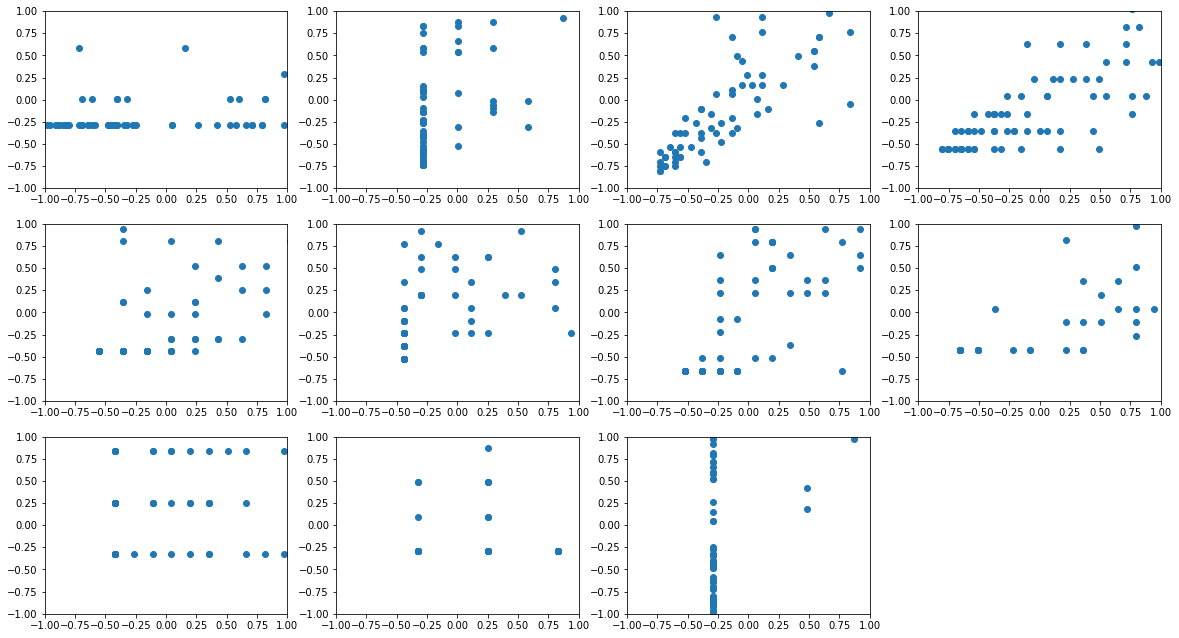

In [380]:
visualize_traces(np.random.permutation(norm_mat_ar_filt[:100,:]),norm_mat_ar_filt.shape[1])

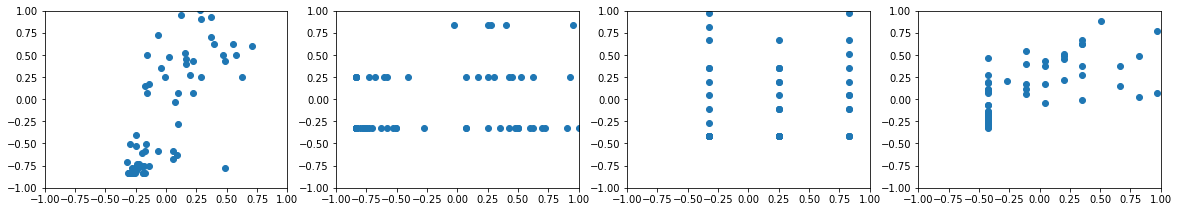

In [381]:
visualize_traces(np.random.permutation(norm_mat_si_filt[:100,:]), norm_mat_si_filt.shape[1])

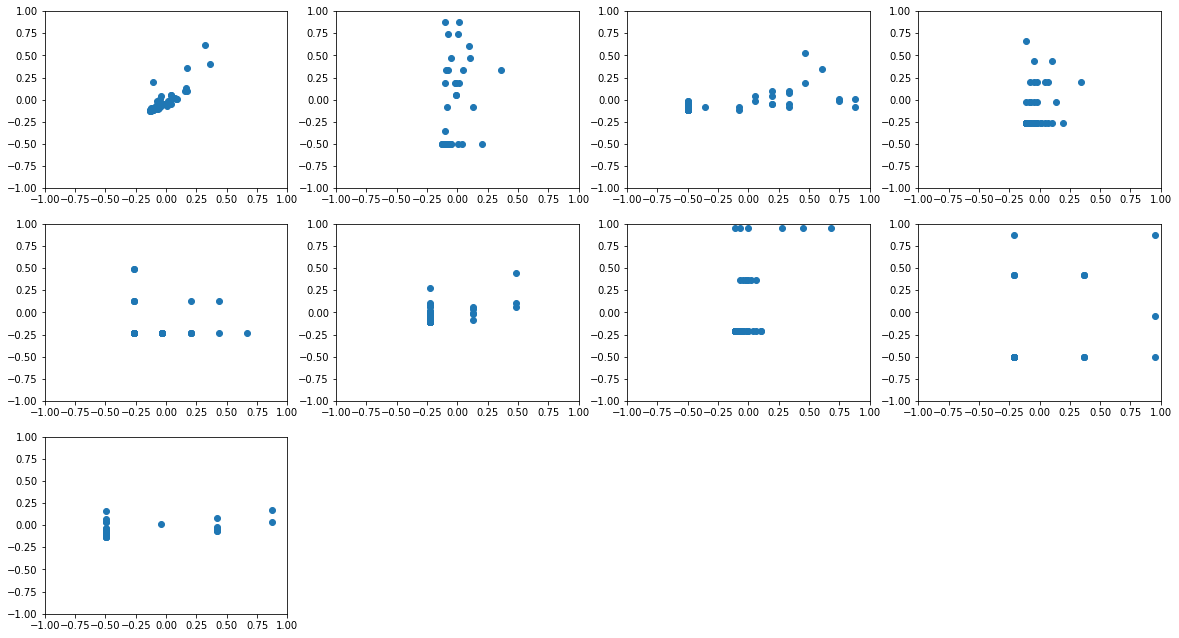

In [382]:
visualize_traces(np.random.permutation(norm_mat_vv_filt[:50,:]),norm_mat_vv_filt.shape[1])

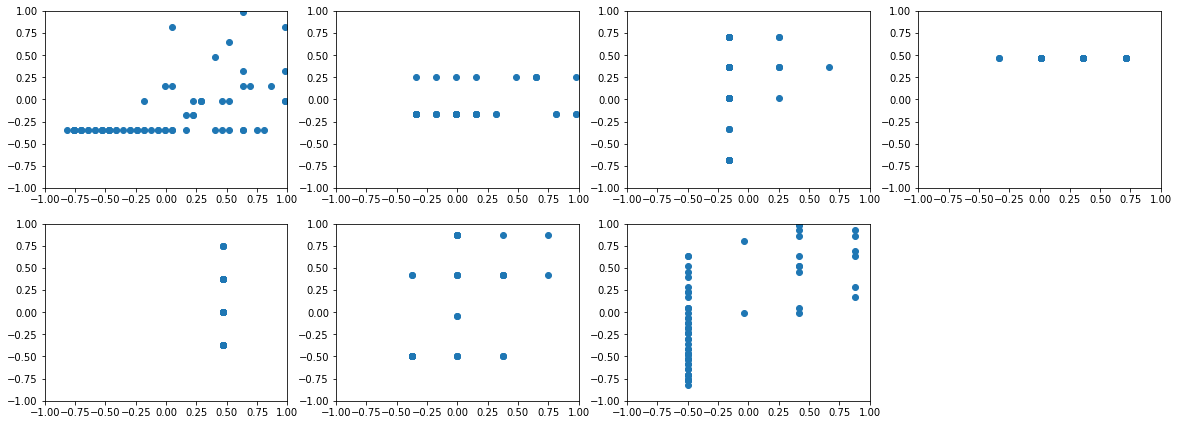

In [383]:
visualize_traces(np.random.permutation(norm_mat_sg_filt[:100,:]),norm_mat_sg_filt.shape[1])

### Visualize Clusters

In [384]:
'''
 Build the visualization of clusters.
 
'''
def f_plot(X,Y):
    id3 = np.where(Y==3)
    id2 = np.where(Y==2)
    id1 = np.where(Y==1)
    id0 = np.where(Y==0)
    plt.plot(X[id3],'bo')
    plt.plot(X[id2],'ro')
    plt.plot(X[id1],'go')
    plt.plot(X[id0],'yo')


def visualize_Hint(norm_mat,Hint,n=11):
    nrows = 4
    fig = plt.figure(figsize=(20,15))
    for i in range(n):
        ax = plt.subplot(nrows, nrows, i+1)
        C_i = Hint[:,i]
        ax.set_xlim([0, 4])
        ax.set_ylim([0, 4])
        f_plot(norm_mat[:,i],C_i)
    plt.show()

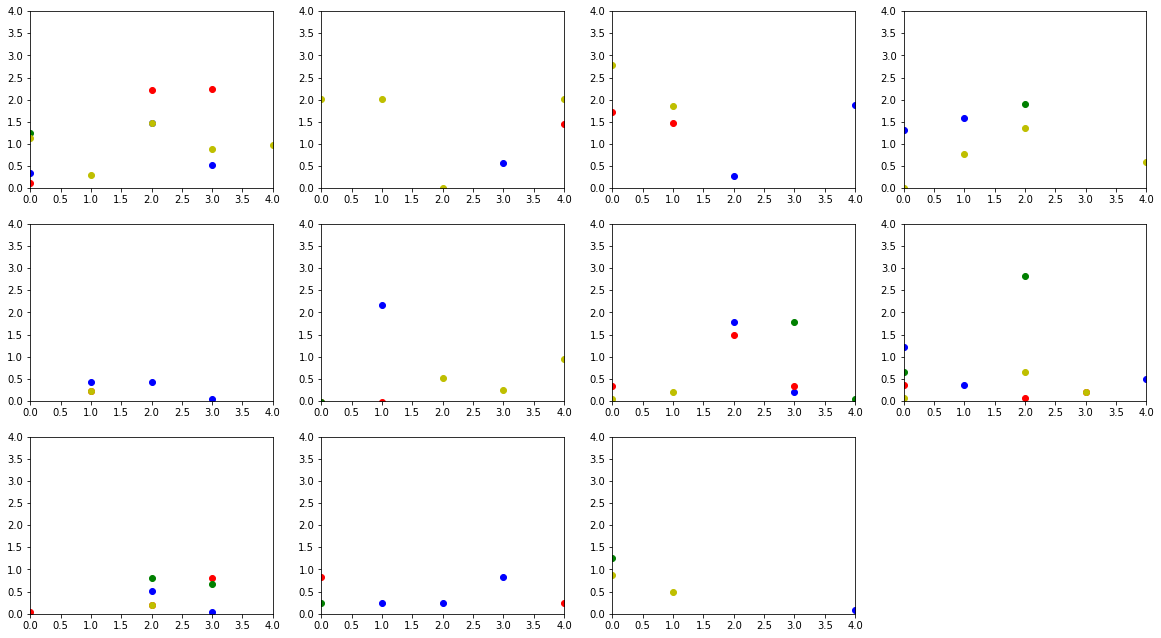

In [385]:
listp = np.random.permutation(range(norm_mat_ar_filt.shape[0]))
matrix_ar = norm_mat_ar_filt[listp,:]
matrix_hint_ar = Hint_ar[listp,:]
visualize_Hint(np.random.permutation(matrix_ar[:,:]),matrix_hint_ar[:,:],norm_mat_ar_filt.shape[1])

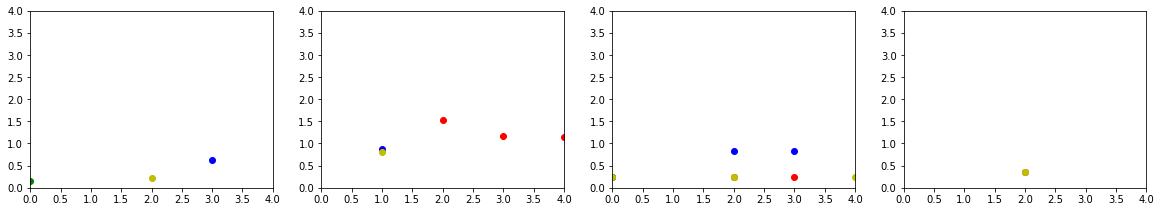

In [386]:
listp = np.random.permutation(range(norm_mat_si_filt.shape[0]))
matrix_si = norm_mat_si_filt[listp,:]
matrix_hint_si = Hint_si[listp,:]
visualize_Hint(np.random.permutation(matrix_si[:,:]),matrix_hint_si[:,:],norm_mat_si_filt.shape[1])

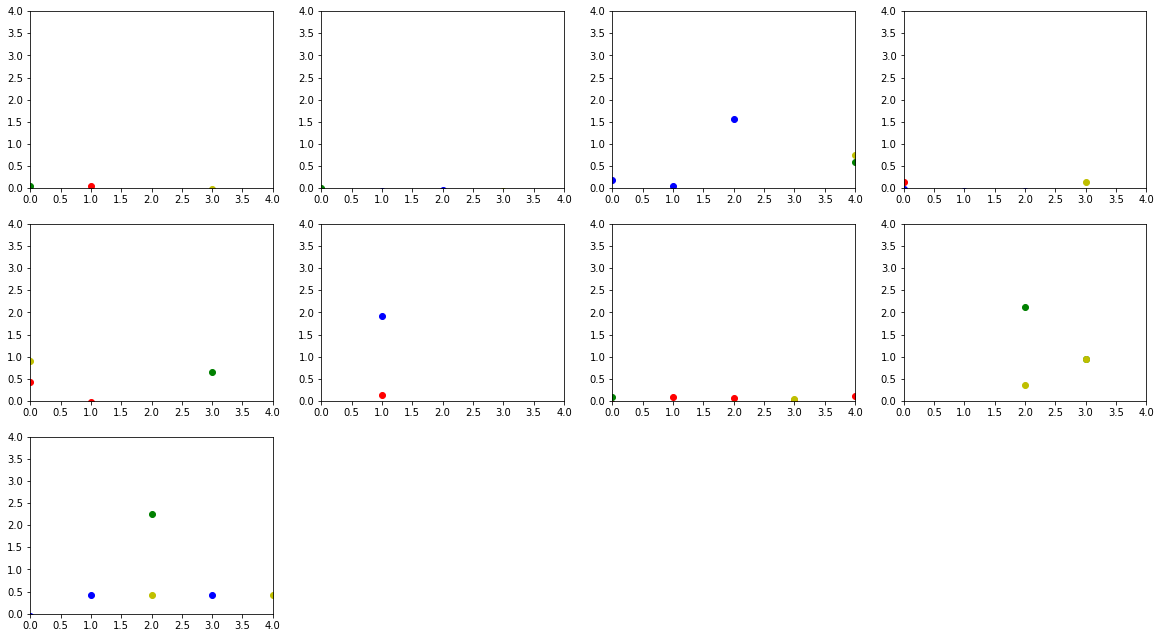

In [387]:
listp = np.random.permutation(range(norm_mat_vv_filt.shape[0]))
matrix_vv = norm_mat_vv_filt[listp,:]
matrix_hint_vv = Hint_vv[listp,:]
visualize_Hint(np.random.permutation(matrix_vv[:,:]),matrix_hint_vv[:,:],norm_mat_vv_filt.shape[1])

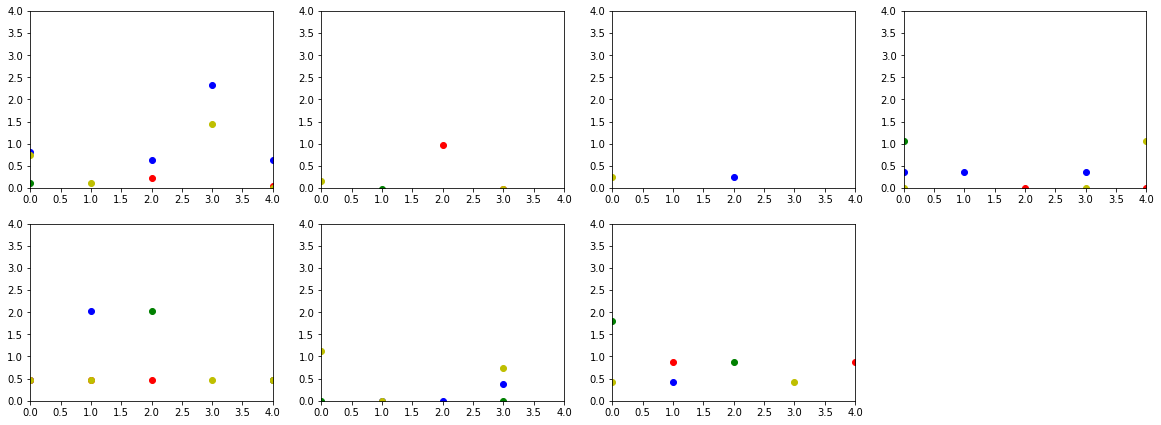

In [388]:
listp = np.random.permutation(range(norm_mat_sg_filt.shape[0]))
matrix_sg = norm_mat_sg_filt[listp,:]
matrix_hint_sg = Hint_sg[listp,:]
visualize_Hint(np.random.permutation(matrix_sg[:,:]),matrix_hint_sg[:,:],norm_mat_sg_filt.shape[1])

Estimation of Labels using Bernard,2017 [Learning Style Identifier: Improving the Precision of Learning Style Identification through Computational Intelligence Algorithms](https://doi.org/10.1016/j.eswa.2017.01.021). and Graf,2009 [Supporting teachers in identifying students’ learning styles in learning management systems:  An automatic student modeling approach](https://www.jstor.org/stable/jeductechsoci.12.4.3?seq=1#metadata_info_tab_contents)


In [389]:
from IPython.display import display, Math, Latex

In [390]:
#display(Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx'))
display(Math(r'LS_{i} = \frac{\sum_{i=1}^{n} C_{ij}}{N}'))

<IPython.core.display.Math object>

### 6. Built Labels

In [391]:
Y_ar = ((Hint_ar.sum(axis=1)/Hint_ar.shape[1]))
Y_si = ((Hint_si.sum(axis=1)/Hint_si.shape[1]))
Y_vv = ((Hint_vv.sum(axis=1)/Hint_vv.shape[1]))
Y_sg = ((Hint_sg.sum(axis=1)/Hint_sg.shape[1]))
Y_norm_ar = ((Hint_ar.sum(axis=1)/Hint_ar.shape[1]))/2
Y_norm_si = ((Hint_si.sum(axis=1)/Hint_si.shape[1])-1)/2
Y_norm_vv = ((Hint_vv.sum(axis=1)/Hint_vv.shape[1])-1)/2
Y_norm_sg = ((Hint_sg.sum(axis=1)/Hint_sg.shape[1])-1)/2
Hint_ar[0]

array([1., 0., 3., 2., 3., 0., 3., 0., 2., 0., 0.])

13.636363636363638
8.0
5.0
9.571428571428571
1.1639131164038916
0.3489403961904978


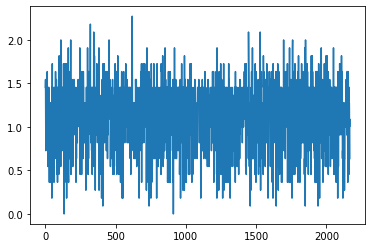

In [392]:
print(Y_ar[:10].sum())
print(Y_si[:10].sum())
print(Y_vv[:10].sum())
print(Y_sg[:10].sum())
print (Y_ar.mean())
print (Y_ar.std())
plt.plot(np.random.permutation(Y_ar))


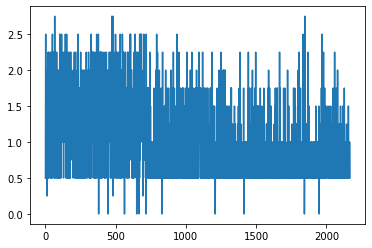

In [393]:
plt.plot(Y_si)


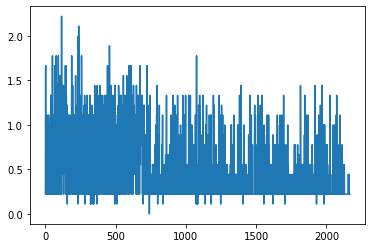

In [394]:
plt.plot(Y_vv)


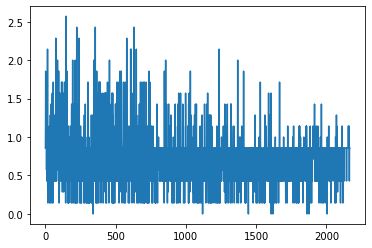

In [395]:
plt.plot(Y_sg)
plt.show()

### Visualize distribution of learning style, under the hypothesis that student behavioral is independent in the learning platform (i.i.d)


In [396]:
'''
 Build the visualization of clusters.
 
'''
def learning_style_distribution(y_ls, ls="LS"):
    mini  = y_ls.min()
    maxi  = y_ls.max()
    mu    = y_ls.mean()
    sigma = y_ls.std()
    # calculate the z-transform
    z1 = ( mini - mu ) / sigma
    z2 = ( maxi - mu ) / sigma

    x = np.arange(z1, z2, 0.01) # range of x in spec
    # mean = 0, stddev = 1, since Z-transform was calculated
    y = norm.pdf(x,0,1)
    y2 = norm.pdf(y_ls,0,1)

    fig, ax = plt.subplots(figsize=(9,6))
    plt.style.use('fivethirtyeight')
    ax.plot(y_ls,y2)
    ax.fill_between(x,y,0, alpha=0.3, color='b')
    ax.fill_between(y_ls,y2,0, alpha=0.1)
    ax.set_xlim([-maxi,maxi])
    ax.set_xlabel('# of Standard Deviations Outside the Mean')
    ax.set_yticklabels([])
    ax.set_title('Normal Gaussian Curve '+ls)
    #plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
    plt.show()



In [397]:
#yar = np.asarray(sorted(Y_ar))
#learning_style_distribution(yar,"FSLSM A\R")

In [398]:
#ysi = np.asarray(sorted(Y_si))
#learning_style_distribution(ysi,"FSLSM S\I")

In [399]:
#yvv = np.asarray(sorted(Y_vv))
#learning_style_distribution(yvv,"FSLSM V\V")

In [400]:
#ysg = np.asarray(sorted(Y_sg))
#learning_style_distribution(ysg,"FSLSM S\G")

### Affect each student to its prior relevant classes.
According to Baldiris S., & Graf. S, 2011 [Dynamic User Modeling and Adaptation Based on Learning Styles for Supporting Semi-Automatic Generation of IMS Learning Design](https://doi.org/10.1109/ICALT.2011.70)
 


   ***FSLSM scaling preferences*** <br>
    <img src="./images/FSLSM_AR_dimension.png" width="55%" heigth="55%"><br>



   ***Dynamic scaling FSLSM using graf***<br>
    <img src="./images/FSLSM_std.png" width="55%" heigth="55%" >

In [523]:
def plot_distribution_data(Y_ar,ls="Active\Reflective"):
    h = sorted(Y_ar)  #sorted
    mu = np.mean(h)
    sigma = np.std(h)
    mini = h[0]
    maxi = h[len(h)-1]
    print('m = {}'.format(mu), 'sigma ={}'.format(sigma))
    fit = norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
    idxmu_m_sigma = np.where(h<mu-sigma)[0]
    idxmu_p_sigma = np.where(h>mu+sigma)[0]
    #x = np.linspace(mini,(mu-sigma),len(idxmu_m_sigma))
    print(len(idxmu_m_sigma))
    print(len(idxmu_p_sigma))
    width = len(h)-(len(idxmu_m_sigma)+len(idxmu_p_sigma))
    print ("Balanced students number = ",width)
    #fit_x = fit[idxmu_m_sigma]
    #pl.fill_between(x,fit_x,0, alpha=0.3, color='b')
    #pl.figure(figsize=(30,15))
    pl.plot(h,fit,'-o')
    #----------------------------------------------------------------------------------------#
    # fill area 1

    pt1 = mu + sigma
    plt.plot([pt1 ,pt1 ],[0.0,norm.pdf(pt1 ,mu, sigma)], color='black')

    pt2 = mu - sigma
    plt.plot([pt2 ,pt2 ],[0.0,norm.pdf(pt2 ,mu, sigma)], color='black')

    ptx = np.linspace(pt1, pt2,width)
    pty = norm.pdf(ptx,mu,sigma)

    #plt.fill_between(ptx, pty, color='#0b559f', alpha='1.0')
    plt.fill_between(ptx, pty, color='red', alpha='1.0')
    #----------------------------------------------------------------------------------------#
    # fill area 2

    pt1 = mu + sigma
    plt.plot([pt1 ,pt1 ],[0.0,norm.pdf(pt1 ,mu, sigma)], color='black')

    pt2 = maxi#mu + 10.0 *sigma
    plt.plot([pt2 ,pt2 ],[0.0,norm.pdf(pt2 ,mu, sigma)], color='black')

    ptx = np.linspace(pt1, pt2,len(idxmu_p_sigma))
    pty = norm.pdf(ptx,mu,sigma)

    plt.fill_between(ptx, pty, color='yellow', alpha='1.0')

    #----------------------------------------------------------------------------------------#
    # fill area 3

    pt1 = mu  - sigma
    plt.plot([pt1 ,pt1 ],[0.0,norm.pdf(pt1 ,mu, sigma)], color='black')

    pt2 = mini  #mu - 10.0 *sigma
    plt.plot([pt2 ,pt2 ],[0.0,norm.pdf(pt2 ,mu, sigma)], color='black')

    ptx = np.linspace(pt1, pt2,len(idxmu_m_sigma))
    pty = norm.pdf(ptx,mu,sigma)

    plt.fill_between(ptx, pty, color='green', alpha='1.')

    plt.grid()
    #pl.grid()
    plt.title('Distribution FSLSM {}'.format(ls),fontsize=10)
    pl.xlabel('LS magnitude',fontsize=10)
    pl.ylabel('Distribution',fontsize=10)

    #pl.hist(h,normed=True)      #use this to draw histogram of your data
    
    pl.show()

def extract_prior_label(X, y):
    N = len(y)
    #y = np.sort(y)
    mu = y.mean()
    sigma = y.std()
    z1 = mu - sigma
    z2 = mu + sigma
    ind_strong = np.where(y>z2)[0] # 1 strong preference
    nb_ind_act = len(ind_strong)
    ind_less = np.where(y<z1)[0] # -1 low  preference
    nb_ind_ref = len(ind_less)

    X_str = X[ind_strong,:]
    print(np.shape(X_str))
    print(np.shape(X[ind_less,:]))
    X_final = np.concatenate((X_str,X[ind_less,:]),axis=0)
    y_strong = y[ind_strong]
    y_final = np.concatenate((y_strong,y[ind_less]),axis=0)
    y_label = np.concatenate((np.ones((nb_ind_act,1)),np.zeros((nb_ind_ref,1))),axis=0)

    print ("Number of E {} so {:02.2f}%".format(nb_ind_act,nb_ind_act*100/N))
    print ("Number of none E {} so {:02.2f}%".format(nb_ind_ref,nb_ind_ref*100/N))
    print ("Number of student with balanced behaviour {} so {:02.2f}%".format(N-(nb_ind_act+nb_ind_ref),(1-(nb_ind_act+nb_ind_ref)/N)*100))
    return X_final, y_final,y_label, ind_strong,ind_less



m = 0.5819565582019457 sigma =0.1744701980952489
334
202
Balanced students number =  1632


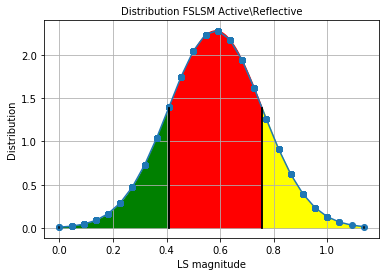

(202, 11)
(334, 11)
Number of E 202 so 9.32%
Number of none E 334 so 15.41%
Number of student with balanced behaviour 1632 so 75.28%


In [524]:
plot_distribution_data(Y_ar/2)
unbalance_Hint_ar,unbalance_y_ar,unbalance_label_ar, id_active_student, id_reflective_student= extract_prior_label(Hint_ar,Y_ar)

m = 0.5021909594095941 sigma =0.27924193386818685
14
388
Balanced students number =  1766


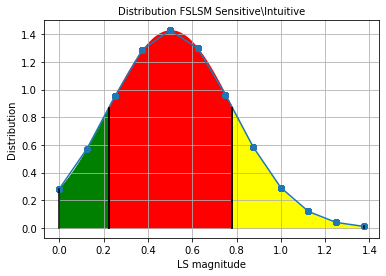

(388, 4)
(14, 4)
Number of E 388 so 17.90%
Number of none E 14 so 0.65%
Number of student with balanced behaviour 1766 so 81.46%


In [525]:
plot_distribution_data(Y_si/2,"Sensitive\Intuitive")
unbalance_Hint_si,unbalance_y_si,unbalance_label_si, id_sensitive_student, id_intuitive_student= extract_prior_label(Hint_si,Y_si)

m = 0.47780852808528085 sigma =0.3672408427744427
1
385
Balanced students number =  1782


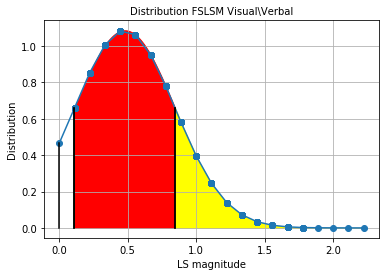

(385, 9)
(1, 9)
Number of E 385 so 17.76%
Number of none E 1 so 0.05%
Number of student with balanced behaviour 1782 so 82.20%


In [526]:
plot_distribution_data(Y_vv,"Visual\Verbal")
unbalance_Hint_vv,unbalance_y_vv,unbalance_label_vv,id_visual_student, id_verbal_student= extract_prior_label(Hint_vv,Y_vv)

m = 0.7362282551396943 sigma =0.3577203019899874
215
237
Balanced students number =  1716


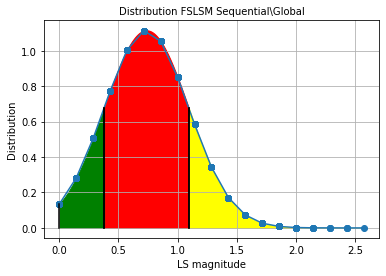

(237, 7)
(215, 7)
Number of E 237 so 10.93%
Number of none E 215 so 9.92%
Number of student with balanced behaviour 1716 so 79.15%


In [527]:
plot_distribution_data(Y_sg,"Sequential\Global")
unbalance_Hint_sg,unbalance_y_sg,unbalance_label_sg,id_sequential_student, id_global_student = extract_prior_label(Hint_sg,Y_sg)

### 8. Remove balanced student learning behaviour

(536, 11)
(402, 4)
(386, 9)
(452, 7)
FSLSM AR label [[0. 0. 0. 0.]]
FSLSM AR value [0.18181818 0.63636364 0.63636364 0.63636364]


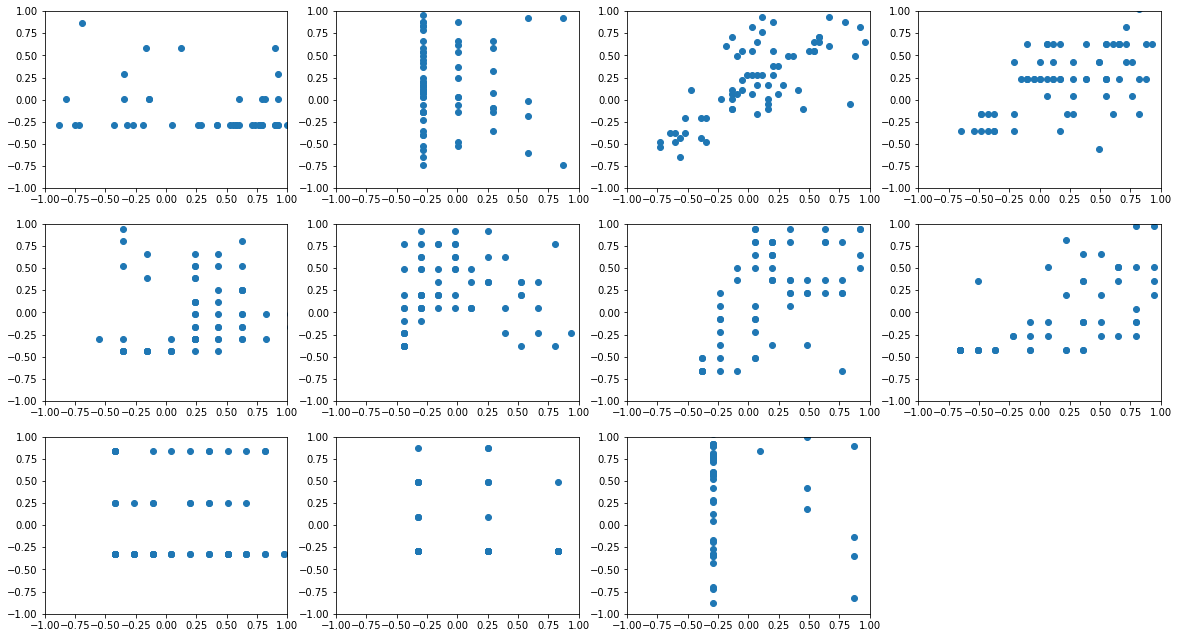

FSLSM SI label [[0. 0. 0. 0.]]
FSLSM SI value [0. 0. 0. 0.]


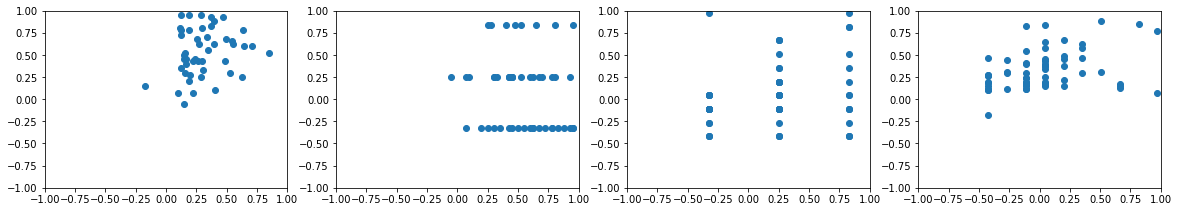

FSLSM VV label [[1. 1. 1. 1.]]
FSLSM VV value [1.11111111 1.         1.33333333 1.11111111]


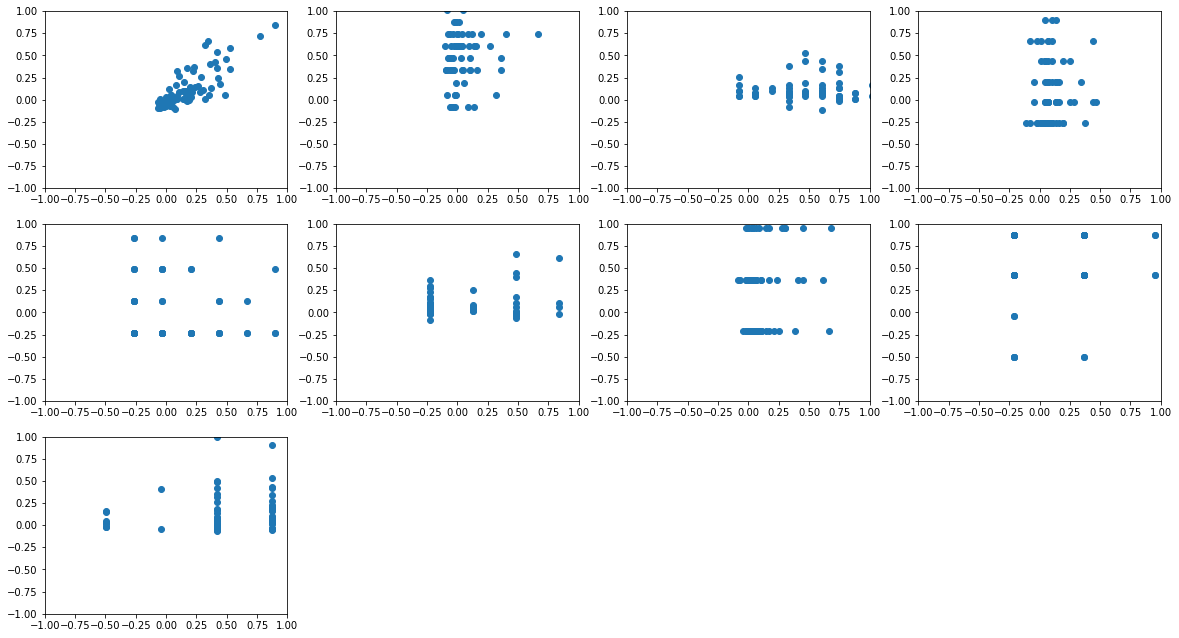

FSLSM SG label [[1. 1. 1. 1. 1.]]
FSLSM SG value [1.14285714 1.85714286 2.14285714 1.14285714 1.28571429]


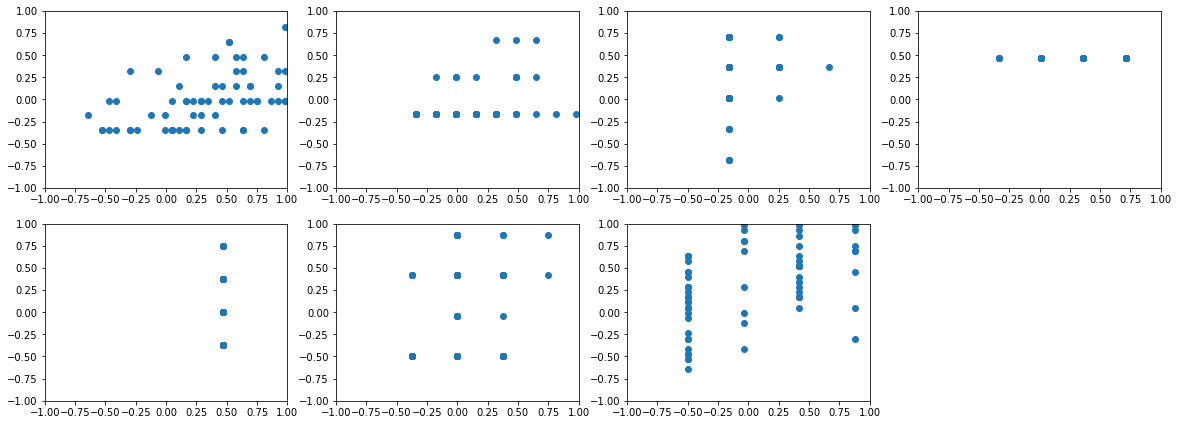

In [422]:
list_ar = sorted(list(id_active_student)+list(id_reflective_student)) #id_active_student, id_reflective_student
list_si = sorted(list(id_sensitive_student)+list(id_intuitive_student))#id_sensitive_student, id_intuitive_student
list_vv = sorted(list(id_visual_student)+list(id_verbal_student))#id_visual_student, id_verbal_student
list_sg = sorted(list(id_sequential_student)+list(id_global_student))#id_sequential_student, id_global_student

print (unbalance_Hint_ar.shape)
print (unbalance_Hint_si.shape)
print (unbalance_Hint_vv.shape)
print (unbalance_Hint_sg.shape)
#unbalance_Hint_ar
print ("FSLSM AR label",unbalance_label_ar[-5:-1].T)
print ("FSLSM AR value",unbalance_y_ar[-5:-1])
visualize_traces(np.random.permutation(norm_mat_ar_filt[list_ar[:100],:]),norm_mat_ar_filt.shape[1])

print ("FSLSM SI label",unbalance_label_si[-5:-1].T)
print ("FSLSM SI value",unbalance_y_si[-5:-1])
visualize_traces(np.random.permutation(norm_mat_si_filt[list_si[:100],:]),norm_mat_si_filt.shape[1])

print ("FSLSM VV label",unbalance_label_vv[-5:-1].T)
print ("FSLSM VV value",unbalance_y_vv[-5:-1])
visualize_traces(np.random.permutation(norm_mat_vv_filt[list_vv[:100],:]),norm_mat_vv_filt.shape[1])

print ("FSLSM SG label",unbalance_label_sg[0:5].T)
print ("FSLSM SG value",unbalance_y_sg[0:5])
visualize_traces(np.random.permutation(norm_mat_sg_filt[list_ar[:100],:]),norm_mat_sg_filt.shape[1])

## Save matrices 
1. Data Feature selection
2. Normalize student traces
3. Hint (Cluster column wise student preferences)
4. Relevant Indexes student strong preferences
5. Normalize student traces with strong preferences
6. Hint of student traces with strong preferences
7. Label of Student Preferences

## Part2. Deep neural net Modeling

In [429]:
data = {}
LS = ['Processing', 'Perception', 'Input', 'Understanding']
data[0] = unbalance_Hint_ar,unbalance_label_ar
data[1] = unbalance_Hint_si,unbalance_label_si
data[2] = unbalance_Hint_vv,unbalance_label_vv
data[3] = unbalance_Hint_sg,unbalance_label_sg

Classes = {} #Style d'apprentissage
Classes[0] = ["Active","Reflective"]
Classes[1] = ["Sensitive","Intuitive"]
Classes[2] = ["Visual","Verbal"] 
Classes[3] = ["Sequential","Global"] 

targets = {}
for i in range(0, len(data)):
    targets[i] = data[i][1]

FSLSM = ["AR","SI","VV","SG"]

In [430]:
for i in range(0, len(data)):
    nb1 = (targets[i]==1).sum()
    nb2 = (targets[i]==0).sum()
    print ("Felder's Dimension: ",LS[i],"\t",Classes [i][0], ": ",nb1, "\n\t\t\t\t\t",Classes [i][1], ": ",nb2)

Felder's Dimension:  Processing 	 Active :  202 
					 Reflective :  334
Felder's Dimension:  Perception 	 Sensitive :  388 
					 Intuitive :  14
Felder's Dimension:  Input 	 Visual :  385 
					 Verbal :  1
Felder's Dimension:  Understanding 	 Sequential :  237 
					 Global :  215


In [431]:
def evaluation_surclassifieur_naif(pos):
    X_train, X_test, Y_train, Y_test  = train_test_split(data[pos][0],targets[pos], test_size=0.2,random_state=0)
    # DummyClassifier to predict only target 0
    print("Classifieur Naif pour: ",LS[pos])
    dummy = DummyClassifier(strategy='most_frequent').fit(X_train, Y_train)
    dummy_pred = dummy.predict(X_test)

    # checking unique labels
    print('Style d\'apprentissage majoritaire prédit: ', Classes[pos][int(np.unique(dummy_pred))])

    # checking accuracy
    print('Test score: ', metrics.accuracy_score(Y_test, dummy_pred))

In [432]:
evaluation_surclassifieur_naif(0)

Classifieur Naif pour:  Processing
Style d'apprentissage majoritaire prédit:  Active
Test score:  0.6574074074074074


In [433]:
evaluation_surclassifieur_naif(1)

Classifieur Naif pour:  Perception
Style d'apprentissage majoritaire prédit:  Intuitive
Test score:  0.9629629629629629


In [434]:
evaluation_surclassifieur_naif(2)

Classifieur Naif pour:  Input
Style d'apprentissage majoritaire prédit:  Verbal
Test score:  1.0


In [435]:
evaluation_surclassifieur_naif(3)

Classifieur Naif pour:  Understanding
Style d'apprentissage majoritaire prédit:  Global
Test score:  0.5494505494505495


From the analysis S/I FSLSM dimension is an imbalanced dimension for the dataset since more than 96% of the students with strong preference are **Intuitive**. Then this dimension shouldn't be model by the DBN algorithm.
In the same way, V/V FSLSM dimension is highly imbalanced : 100% of the students have **Visual** preference from the dataset. (this confirm Garcia which state that the V.V dimension shouldn't be model by computer intelligence algo for "engineer" students)
Those two dimensions (S/I, V/V), will not be taken into account within the evaluation

In [436]:
 #Data
 np.save("../output/data/pareto_ar.npy",mat_ar_filt)
 np.save("../output/data/pareto_si.npy",mat_si_filt)
 np.save("../output/data/pareto_vv.npy",mat_vv_filt)
 np.save("../output/data/pareto_sg.npy",mat_sg_filt)
 #Normalize
 np.save("../output/data/norm_ar.npy",norm_mat_ar_filt)
 np.save("../output/data/norm_si.npy",norm_mat_si_filt)
 np.save("../output/data/norm_vv.npy",norm_mat_vv_filt)
 np.save("../output/data/norm_sg.npy",norm_mat_sg_filt)
 #Hint
 np.save("../output/data/Hint_ar.npy",Hint_ar)
 np.save("../output/data/Hint_si.npy",Hint_si)
 np.save("../output/data/Hint_vv.npy",Hint_vv)
 np.save("../output/data/Hint_sg.npy",Hint_sg)
 #Relevant Students Index list with strong preferences
 np.save("../output/data/index_strong_ar.npy",list_ar)
 np.save("../output/data/index_strong_si.npy",list_si)
 np.save("../output/data/index_strong_vv.npy",list_vv)
 np.save("../output/data/index_strong_sg.npy",list_sg)
 #Normalize traces of students with strong preferences
 np.save("../output/data/norm_strong_ar.npy",norm_mat_ar_filt[list_ar,:])
 np.save("../output/data/norm_strong_si.npy",norm_mat_si_filt[list_si,:])
 np.save("../output/data/norm_strong_vv.npy",norm_mat_vv_filt[list_vv,:])
 np.save("../output/data/norm_strong_sg.npy",norm_mat_sg_filt[list_sg,:])
 # Hint of student traces with strong preferences
 np.save("../output/data/strong_hint_ar.npy",unbalance_Hint_ar)
 np.save("../output/data/strong_hint_si.npy",unbalance_Hint_si)
 np.save("../output/data/strong_hint_vv.npy",unbalance_Hint_vv)
 np.save("../output/data/strong_hint_sg.npy",unbalance_Hint_sg)
 # Labelled student preference FSLSM
 np.save("../output/data/unbalanced_label_ar.npy",unbalance_label_ar)
 np.save("../output/data/unbalanced_label_si.npy",unbalance_label_si)
 np.save("../output/data/unbalanced_label_vv.npy",unbalance_label_vv)
 np.save("../output/data/unbalanced_label_sg.npy",unbalance_label_sg)

### 9. Isomorphic tansformation of Hint for the model

In [3]:
#binarized data
""" transform features in binary format to train in the DBN.
@Input: Hint: matrix of preferences
@Output: xp : binarized data to be trained by te model
"""
def binarized_features(data):
    enc = {}
    (m,n) = data.shape
    nb_features = 3*n
    enc[0] = [0, 0, 1]
    enc[1] = [0, 1, 0]
    enc[2] = [0, 1, 1]
    enc[3] = [1, 0, 0]
    xp = np.zeros((data.shape[0],nb_features))
    for i,row in enumerate(data):
        l = [enc[elt] for elt in row]
        xp[i] = np.hstack(l)
    return xp

In [8]:
bin_Hint_ar =binarized_features(unbalance_Hint_ar)
bin_Hint_ar[0]

NameError: name 'unbalance_Hint_ar' is not defined

In [9]:
#bin_Hint_si =binarized_features(unbalance_Hint_si)
#bin_Hint_si[0]

In [10]:
#bin_Hint_vv =binarized_features(unbalance_Hint_vv)
#bin_Hint_vv[0]

In [11]:
bin_Hint_sg =binarized_features(unbalance_Hint_sg)
bin_Hint_sg[0]

NameError: name 'unbalance_Hint_sg' is not defined

### 10. Instantiate the model

In [4]:
from model.MDBN import MDBN   #model.MDBN import MDBN

In [5]:
dbn_feats_ar = np.load("./output/data/strong_hint_ar.npy")
label_ar = np.load("./output/data/unbalanced_label_ar.npy")
binarized_features(dbn_feats_ar)

array([[0., 1., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       ...,
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.]])

In [31]:
#Spliting the data
X_hint_bint = binarized_features(dbn_feats_ar)
X_dbn, X_test, Y_dbn, Y_test  = train_test_split(X_hint_bint,label_ar, test_size=0.2,random_state=1245)  
cw = {}
for l in set(Y_dbn[:,0]):
    cw[l] = np.sum(Y_dbn[:,0] == l)  
cw

{0.0: 261, 1.0: 167}

In [32]:

#np.random.seed(1337)  # for reproducibility
def evaluation_model_MLSIM(X_dbn,Y_dbn,fslsm_dim="A/R"):
    
    #X_train, X_valid, Y_train, Y_valid  = train_test_split(X_dbn,Y_dbn, test_size=0.2,random_state=rng)    
    print("Model MLSIM pour: ",fslsm_dim)
    n = np.shape(X_dbn)[0]
    m = np.shape(X_dbn)[1]
    print (n,m)
    print ("Nbr students:", n)
    print ("Learning traces dimension:",m)
    # construct DBN
    nhid_param1 = 2*m  #HYPERPARAMS.nb_hiden_node2 #nobre de noeuds de la deuxime couche cachée
    nhid_param2 = int(m/2) #HYPERPARAMS.nb_hiden_node1 #nobre de noeuds de la premiere couche cachée
    #dbn = MDBN(input_data=X_train_feats, label=Y_train, input_size=m, hidden_layer_sizes=[nhid_param1, nhid_param2], output_size=1, batch_size=Training.batch_size, learning_rate=HYPERPARAMS.learning_rate,epochs=Training.epochs, C=HYPERPARAMS.C)
    dbn = MDBN(input_data=X_dbn, label=Y_dbn, input_size=m, hidden_layer_sizes=[nhid_param1, nhid_param2], output_size=1, batch_size=50, learning_rate=0.9,epochs=700, C=0.60)    
    start = time.time()
    # pre-training (TrainUnsupervisedDBN)
    print ("Training the Hybrid Deep Belief Net model \n................")
    dbn.train(X_dbn)
    print ("Unsupervised training time: ",(time.time()-start)," seconds")
    # fine-tuning (DBNSupervisedFineTuning)
    synthetic_V_list, h_list = dbn.predict(X_dbn)
    print("Original Features:",X_dbn[0:3])
    print("Visible Features at the end of the DBN",synthetic_V_list[-1][0:3])
    print("Hidden Features at the end of the DBN",h_list[-1][0:3])
    #finetune training the last layer
    #print ("Supervised training time: ",(time.time()-start)," seconds")
    #dbn.finetune(X_dbn,Y_dbn,"Train data",bytraining=True)

    #accuracy = dbn.evaluate(X_test,Y_test,"Test data",verbose=True)    
    return dbn

In [33]:
dbn = evaluation_model_MLSIM(X_dbn,Y_dbn,"A/R")

Model MLSIM pour:  A/R
428 33
Nbr students: 428
Learning traces dimension: 33
Initialize weigths [[-0.01301848  0.00271236 -0.00780576 ... -0.02004803  0.00674691
   0.00690714]
 [-0.02978242 -0.00346133  0.01424024 ...  0.01693256  0.02616023
  -0.00995238]
 [-0.02465619  0.01183521  0.00845612 ...  0.00544286 -0.01746479
   0.02469033]
 ...
 [-0.00076006 -0.00250762 -0.0069318  ... -0.00218038  0.00784919
  -0.0068352 ]
 [ 0.0212275   0.0230254   0.02646023 ... -0.01165314  0.01115613
  -0.00397141]
 [-0.02974401  0.0061648   0.00704324 ... -0.01792214 -0.0132688
   0.01341676]]
Initialize weigths [[ 0.00685388  0.00626126  0.00843059 ... -0.01309512 -0.00389763
  -0.00167403]
 [ 0.00778948 -0.00287992  0.00818311 ...  0.01126156  0.01436915
  -0.00477179]
 [-0.01206191  0.00323629 -0.00636232 ...  0.00568541  0.01132183
   0.00680867]
 ...
 [-0.01158062 -0.00997692  0.01487352 ...  0.00872185 -0.012475
  -0.00040782]
 [-0.01092697 -0.00939731 -0.01379547 ... -0.01435735 -0.00330543


In [34]:
w = dbn.getweights()

In [35]:
print(w)

{0: {'W': array([[-0.44408163, -0.12943952, -1.35526266, ..., -0.5442022 ,
         0.04816927,  0.32489041],
       [-2.02567771, -0.39560706,  2.53714585, ..., -1.72526369,
         0.10533756,  1.02706304],
       [-0.04412659, -0.08057893, -0.43825195, ..., -0.26619081,
         0.03281063, -0.44253812],
       ...,
       [-0.57963073,  1.13138665,  0.0919072 , ..., -0.31228904,
         0.00485275, -0.6994545 ],
       [ 0.64953923,  1.33435416,  0.27539843, ..., -2.67638846,
         1.7812822 , -0.0164785 ],
       [-2.0481622 ,  1.33344292,  1.19456215, ..., -2.91667902,
        -0.6701748 ,  3.01684886]]), 'h': array([[-0.52017663, -3.48596698, -1.27125455, -1.6198337 , -1.04817861,
        -4.30768982, -3.69536242, -2.06949882, -4.96918833, -1.22329582,
        -3.58086679, -0.89198858, -1.97310986, -3.21612947, -0.09496517,
        -3.41304505, -1.23142971, -2.613462  , -0.21594074, -3.00066422,
        -0.68795137, -2.70973111, -2.71699405, -0.96546052, -1.81489245,
      

In [54]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,precision_recall_curve,auc

In [37]:
msg = "Train data"
predictions = dbn.finetune(X_dbn,Y_dbn,msg,bytraining=True)
print (msg," Model accuracy :",accuracy_score(Y_dbn,predictions))
print (msg," Confusion matrix :\n",confusion_matrix(Y_dbn,predictions))

Finetuning with SVM
Time fitting the data:  0.011155843734741211
Train data  Model accuracy : 1.0
Train data  Confusion matrix :
 [[261   0]
 [  0 167]]


In [41]:
msg = "Test data"
predictions = dbn.finetune(X_test,Y_test,msg,bytraining=False)
print (msg," Model accuracy :",accuracy_score(Y_test,predictions))
print (msg," Confusion matrix :\n",confusion_matrix(Y_test,predictions))

Test data  Model accuracy : 0.9907407407407407
Test data  Confusion matrix :
 [[73  0]
 [ 1 34]]


In [44]:
dbn_feats_si = np.load("./output/data/moodle2017/strong_hint_si.npy")
label_si = np.load("./output/data/moodle2017/unbalanced_label_si.npy")
binarized_features(dbn_feats_si)

array([[0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [45]:
#Spliting the data
X_hint_bint_si = binarized_features(dbn_feats_si)
X_dbn_si, X_test_si, Y_dbn_si, Y_test_si  = train_test_split(X_hint_bint_si,label_si, test_size=0.2,random_state=1245)  
cw = {}
for l in set(Y_dbn_si[:,0]):
    cw[l] = np.sum(Y_dbn_si[:,0] == l)  
cw

{0.0: 12, 1.0: 309}

In [47]:
dbn_si = evaluation_model_MLSIM(X_dbn_si,Y_dbn_si,"S/I")

Model MLSIM pour:  S/I
321 12
Nbr students: 321
Learning traces dimension: 12
Initialize weigths [[-6.91300339e-02 -7.80237102e-02 -4.03026922e-02 -8.28318590e-02
   2.60355659e-02  3.59548389e-02 -3.50853222e-02 -3.05723260e-02
   6.13392017e-02 -8.12586028e-02 -3.56581477e-02 -2.21806647e-02]
 [ 6.80401081e-02 -3.60991977e-02  5.84525393e-02  7.85961840e-02
   6.18212395e-02 -6.78132734e-02 -3.37869926e-03  1.10970193e-02
   3.32844222e-02  2.30944244e-02  1.51434699e-02  5.98511961e-02]
 [-2.73479038e-02 -4.17180840e-02 -2.26898010e-02 -2.02538802e-02
   2.71529442e-02  1.04799851e-02 -6.74796402e-02 -7.19264190e-02
  -6.43344990e-03 -3.32711960e-02 -1.35162406e-02  4.09919942e-02]
 [ 2.46918933e-02 -1.48983297e-02 -3.71759044e-02 -3.02965339e-02
  -6.07233361e-03 -3.03933796e-02 -3.54937382e-02 -8.34498148e-03
   4.29565322e-02 -4.25486111e-02 -8.27104851e-02 -1.80603908e-02]
 [-3.83730541e-02 -4.25824760e-02  3.90188167e-02  1.05121603e-02
   7.56032224e-02  1.65348116e-02  6.3078

In [48]:
msg = "Train data"
predictions = dbn_si.finetune(X_dbn_si,Y_dbn_si,msg,bytraining=True)
print (msg," Model accuracy :",accuracy_score(Y_dbn_si,predictions))
print (msg," Confusion matrix :\n",confusion_matrix(Y_dbn_si,predictions))

Finetuning with SVM
Time fitting the data:  0.00527191162109375
Train data  Model accuracy : 1.0
Train data  Confusion matrix :
 [[ 12   0]
 [  0 309]]


Finetuning with SVM
Time fitting the data:  0.0017380714416503906
Test data  Model accuracy : 1.0
Test data  Confusion matrix :
 [[ 2  0]
 [ 0 79]]


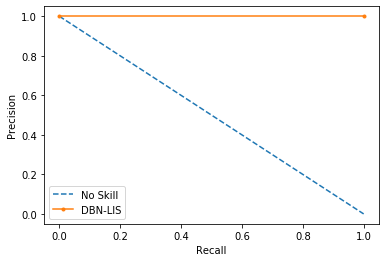

AUC PR: 1.000


In [55]:
msg = "Test data"
predictions = dbn_si.finetune(X_test_si,Y_test_si,msg,bytraining=True)
print (msg," Model accuracy :",accuracy_score(Y_test_si,predictions))
print (msg," Confusion matrix :\n",confusion_matrix(Y_test_si,predictions))

plt.plot([0, 1], [1, 0], linestyle='--', label='No Skill')

# calculate inputs for the PR curve
precision, recall, thresholds = precision_recall_curve(Y_test_si, predictions)

# plot PR curve
plt.plot(recall, precision, marker='.', label='DBN-LIS')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
plt.show()

# calculate and print PR AUC
auc_pr = auc(recall, precision)
print('AUC PR: %.3f' % auc_pr)